In [0]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as pyplot

In [0]:
dataset = pandas.read_csv("train.csv")
dataset.fillna(dataset.mean(axis=0), inplace= True)

In [204]:
values = dataset.values
"""X = dataset.iloc[:,0:27]
Y = dataset.iloc[:,85]"""

'X = dataset.iloc[:,0:27]\nY = dataset.iloc[:,85]'

In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)

In [211]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var209(t)  var210(t)  var211(t)
1   0.000000   0.287806   0.436332  ...   0.584393   0.416715   0.416715
2   0.000025   0.287806   0.436332  ...   0.618837   0.300457   0.300457
3   0.000050   0.287806   0.360283  ...   0.595089   0.404007   0.404007
4   0.000075   0.287806   0.360595  ...   0.562772   0.151735   0.151735
5   0.000100   0.555556   0.223753  ...   0.589305   0.244763   0.244763

[5 rows x 422 columns]


In [0]:
train_X = reframed.iloc[:,0:27]
train_y = reframed.iloc[:,85]

In [220]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(39999, 27) (39999,) (115581, 27) (115581,)


In [219]:
test_data = pandas.read_csv('test_2.csv')
test_data.fillna(dataset.mean(axis = 0), inplace = True)
test_X = test_data.iloc[:,0:27]
test_y = test_data.iloc[:,85]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [225]:
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[0])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

TypeError: ignored

In [226]:
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


ValueError: ignored

KeyError: ignored

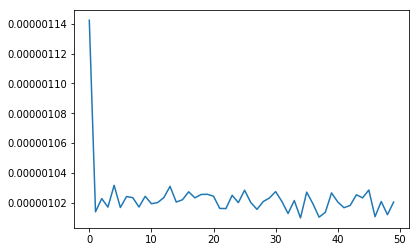

In [229]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()